In [1]:
import os,sys,inspect
sys.path.insert(1, os.path.join(sys.path[0], '..'))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import env.env as env
import numpy as np

In [9]:
import random
height=4
width=4

In [10]:
states = [[i, j] for i in range(4) for j in range(4)]

In [42]:
#One Episodestartx=random.randint(0,3)
grid=env.Grid_game(height,width)
Counter=np.zeros((width,height))
#starty=0
#startx=3
history=[]
Returns=np.zeros((height,width))
rewards=0
k=0.8

y,x=grid.player.curpos

num_episodes=10000
for i in range(num_episodes):
    state_list=[]
    starty,startx = random.choice(states[1:-1])
    grid.set_pos(starty,startx)
    iteration=0
    rewards=0
    
    while(not grid.state):
        
        oldpos=grid.player.curpos[:]
        iteration+=1
        state,cur_state,reward,_=grid.transition()
        
        
        curpos=grid.player.curpos[:]
        Counter[curpos[0]][curpos[1]]+=1
        grid.vst[oldpos[0]][oldpos[1]]=grid.vst[oldpos[0]][oldpos[1]]+(1/Counter[curpos[0]][curpos[1]])*(-1+k*grid.vst[curpos[0]][curpos[1]]
                                                                                               -grid.vst[oldpos[0]][oldpos[1]])
        grid.vst=np.round(grid.vst,3)
        
    history.append(grid.vst[:].copy())
        




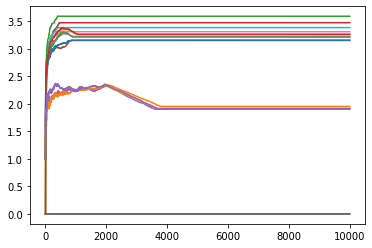

In [43]:
import matplotlib.pyplot as plt

history=np.array(history).reshape(num_episodes,16)
for i in range(16):
    plt.plot(history[0:num_episodes,i]*-1)

In [44]:
grid.vst

array([[ 0.   , -1.954, -3.226, -3.476],
       [-1.903, -3.153, -3.312, -3.214],
       [-3.266, -3.387, -3.158, -1.918],
       [-3.593, -3.264, -1.913,  0.   ]])

In [28]:


grid=env.Grid_game(height,width)
Counter=np.zeros((width,height))
#starty=0
#startx=3
history=[]

Returns=np.zeros((height,width))
rewards=0
k=0.8

y,x=grid.player.curpos

num_episodes=10000
for i in range(num_episodes):
    state_list=[]
    action_list=[]
    starty,startx = random.choice(states[1:-1])
    grid.set_pos(starty,startx)
    iteration=0
    rewards=0
    state_list.append(grid.player.curpos[:])
    state,cur_state,reward,action=grid.transition()
    action_list.append(action)  
    state_list.append(grid.player.curpos[:])
    while(not grid.state):
        state,cur_state,reward,action=grid.transition()
        action_list.append(action)
        

    state_list.reverse()   
    G=0
    for act,pos in zip(action_list,state_list):
        
        G=G*k+(grid.fix_reward_val)
        Counter[pos[0]][pos[1]]+=1
        grid.ast[act][pos[0]][pos[1]]=grid.ast[act][pos[0]][pos[1]]+(0.001)*(G-grid.ast[act][pos[0]][pos[1]])
    grid.ast=np.round(grid.ast,3)
  #  print(grid.vst)
    
    history.append(grid.vst[:].copy())
        

In [29]:
grid.ast

array([[[-0.162, -0.514, -0.529, -0.562],
        [-0.433, -0.457, -0.447, -0.457],
        [-0.436, -0.421, -0.45 , -0.272],
        [-0.33 , -0.327, -0.248,  0.   ]],

       [[ 0.   , -0.266, -0.359, -0.356],
        [-0.268, -0.481, -0.449, -0.46 ],
        [-0.451, -0.481, -0.44 , -0.396],
        [-0.538, -0.532, -0.528, -0.169]],

       [[ 0.   , -0.302, -0.493, -0.563],
        [-0.236, -0.47 , -0.466, -0.543],
        [-0.344, -0.427, -0.457, -0.508],
        [-0.329, -0.481, -0.4  , -0.154]],

       [[-0.199, -0.426, -0.477, -0.338],
        [-0.506, -0.445, -0.446, -0.352],
        [-0.549, -0.465, -0.462, -0.228],
        [-0.532, -0.448, -0.234,  0.   ]]])